In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [30]:
# Define the ticker symbol for SPY
ticker = 'SPY'

# Get the historical prices for this ticker
dat = yf.Ticker(ticker)

# Get the historical prices for this ticker
hist = dat.history(period = 'max', interval = '1d')
hist.reset_index(inplace = True)
hist['symbol'] = ticker
hist['yest_close'] = hist['Close'].shift(1)
hist['yest_vol'] = hist['Volume'].shift(1)
hist['perc_close'] = (hist['Close'] - hist['yest_close']) / hist['yest_close']
hist['perc_vol'] = (hist['Volume'] - hist['yest_vol']) / hist['yest_vol']
hist['target'] = hist['perc_close'] > 0

In [31]:
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,symbol,yest_close,yest_vol,perc_close,perc_vol,target
0,1993-01-29 00:00:00-05:00,24.858339,24.858339,24.734666,24.840672,1003200,0.0,0.0,0.0,SPY,NaN,NaN,NaN,NaN,False
1,1993-02-01 00:00:00-05:00,24.858360,25.017368,24.858360,25.017368,480500,0.0,0.0,0.0,SPY,24.840672,1003200.0,0.007113,-0.521033,True
2,1993-02-02 00:00:00-05:00,24.999692,25.088030,24.946689,25.070362,201300,0.0,0.0,0.0,SPY,25.017368,480500.0,0.002118,-0.581061,True
3,1993-02-03 00:00:00-05:00,25.105686,25.353033,25.088019,25.335365,529400,0.0,0.0,0.0,SPY,25.070362,201300.0,0.010570,1.629906,True
4,1993-02-04 00:00:00-05:00,25.423708,25.494379,25.141026,25.441376,531500,0.0,0.0,0.0,SPY,25.335365,529400.0,0.004184,0.003967,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,2024-01-31 00:00:00-05:00,488.619995,489.079987,482.859985,482.880005,126011100,0.0,0.0,0.0,SPY,490.890015,58618400.0,-0.016317,1.149685,False
7807,2024-02-01 00:00:00-05:00,484.630005,489.230011,483.799988,489.200012,91891600,0.0,0.0,0.0,SPY,482.880005,126011100.0,0.013088,-0.270766,True
7808,2024-02-02 00:00:00-05:00,489.649994,496.049988,489.299988,494.350006,99147700,0.0,0.0,0.0,SPY,489.200012,91891600.0,0.010527,0.078964,True
7809,2024-02-05 00:00:00-05:00,493.700012,494.380005,490.230011,492.549988,75757100,0.0,0.0,0.0,SPY,494.350006,99147700.0,-0.003641,-0.235917,False


In [32]:
hist.iloc[0:7]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,symbol,yest_close,yest_vol,perc_close,perc_vol,target
0,1993-01-29 00:00:00-05:00,24.858339,24.858339,24.734666,24.840672,1003200,0.0,0.0,0.0,SPY,NaN,NaN,NaN,NaN,False
1,1993-02-01 00:00:00-05:00,24.858360,25.017368,24.858360,25.017368,480500,0.0,0.0,0.0,SPY,24.840672,1003200.0,0.007113,-0.521033,True
2,1993-02-02 00:00:00-05:00,24.999692,25.088030,24.946689,25.070362,201300,0.0,0.0,0.0,SPY,25.017368,480500.0,0.002118,-0.581061,True
3,1993-02-03 00:00:00-05:00,25.105686,25.353033,25.088019,25.335365,529400,0.0,0.0,0.0,SPY,25.070362,201300.0,0.010570,1.629906,True
4,1993-02-04 00:00:00-05:00,25.423708,25.494379,25.141026,25.441376,531500,0.0,0.0,0.0,SPY,25.335365,529400.0,0.004184,0.003967,True
5,1993-02-05 00:00:00-05:00,25.423702,25.476705,25.282361,25.423702,492100,0.0,0.0,0.0,SPY,25.441376,531500.0,-0.000695,-0.074130,False
6,1993-02-08 00:00:00-05:00,25.423702,25.512040,25.388367,25.423702,596100,0.0,0.0,0.0,SPY,25.423702,492100.0,0.000000,0.211339,False


In [22]:
hist.Close.iloc[0:7]

0    24.840681
1    25.017365
2    25.070354
3    25.335363
4    25.441389
5    25.423706
6    25.423706
Name: Close, dtype: float64

In [35]:
row = 7
close_dat = hist.perc_close.iloc[(row - 7):row]
vol_dat = hist.perc_vol.iloc[(row - 7):row]

In [33]:
hist.Date[row]

Timestamp('1993-02-09 00:00:00-0500', tz='America/New_York')

In [36]:
tmp = pd.DataFrame({
    "date": hist.Date[row],
    "target": hist.target[row],
    "close_lag1": close_dat[row - 1],
    "close_lag2": close_dat[row - 2],
    "close_lag3": close_dat[row - 3],
    "close_lag4": close_dat[row - 4],
    "close_lag5": close_dat[row - 5],
    "close_lag6": close_dat[row - 6],
    "close_lag7": close_dat[row - 7],
    "std_close": np.std(close_dat),
    "max_close": np.max(close_dat),
    "min_close": np.min(close_dat),
    "med_close": np.median(close_dat),
    "vol_lag1": vol_dat[row - 1],
    "vol_lag2": vol_dat[row - 2],
    "vol_lag3": vol_dat[row - 3],
    "vol_lag4": vol_dat[row - 4],
    "vol_lag5": vol_dat[row - 5],
    "vol_lag6": vol_dat[row - 6],
    "vol_lag7": vol_dat[row - 7],
    "std_vol": np.std(vol_dat),
    "max_vol": np.max(vol_dat),
    "min_vol": np.min(vol_dat),
    "med_vol": np.median(vol_dat),}, index = [0])
tmp

,date,target,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,close_lag7,std_close,...,vol_lag2,vol_lag3,vol_lag4,vol_lag5,vol_lag6,vol_lag7,std_vol,max_vol,min_vol,med_vol
0,1993-02-09 00:00:00-05:00,False,0.0,-0.000695,0.004184,0.01057,0.002118,0.007113,NaN,0.003966,...,-0.07413,0.003967,1.629906,-0.581061,-0.521033,NaN,0.734993,1.629906,-0.581061,NaN


In [42]:
full_dat = pd.DataFrame()

In [43]:
for row in range(0, hist.shape[0]):
    if row < 8:
        continue

    close_dat = hist.perc_close.iloc[(row - 7):row]
    vol_dat = hist.perc_vol.iloc[(row - 7):row]
    
    tmp = pd.DataFrame({
        "date": hist.Date[row],
        "target": hist.target[row],
        "close_lag1": close_dat[row - 1],
        "close_lag2": close_dat[row - 2],
        "close_lag3": close_dat[row - 3],
        "close_lag4": close_dat[row - 4],
        "close_lag5": close_dat[row - 5],
        "close_lag6": close_dat[row - 6],
        "close_lag7": close_dat[row - 7],
        "std_close": np.std(close_dat),
        "max_close": np.max(close_dat),
        "min_close": np.min(close_dat),
        "med_close": np.median(close_dat),
        "vol_lag1": vol_dat[row - 1],
        "vol_lag2": vol_dat[row - 2],
        "vol_lag3": vol_dat[row - 3],
        "vol_lag4": vol_dat[row - 4],
        "vol_lag5": vol_dat[row - 5],
        "vol_lag6": vol_dat[row - 6],
        "vol_lag7": vol_dat[row - 7],
        "std_vol": np.std(vol_dat),
        "max_vol": np.max(vol_dat),
        "min_vol": np.min(vol_dat),
        "med_vol": np.median(vol_dat)}, index = [0])

    full_dat = pd.concat([train_dat, tmp], ignore_index = True)

full_dat

,date,target,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,close_lag7,std_close,...,vol_lag2,vol_lag3,vol_lag4,vol_lag5,vol_lag6,vol_lag7,std_vol,max_vol,min_vol,med_vol
0,1993-02-10 00:00:00-05:00,True,-0.006949,0.000000,-0.000695,0.004184,0.010570,0.002118,0.007113,0.005277,...,0.211339,-0.074130,0.003967,1.629906,-0.581061,-0.521033,0.750799,1.629906,-0.795169,-0.074130
1,1993-02-11 00:00:00-05:00,True,0.001399,-0.006949,0.000000,-0.000695,0.004184,0.010570,0.002118,0.004904,...,-0.795169,0.211339,-0.074130,0.003967,1.629906,-0.581061,1.016205,2.108927,-0.795169,0.003967
2,1993-02-10 00:00:00-05:00,True,-0.006949,0.000000,-0.000695,0.004184,0.010570,0.002118,0.007113,0.005277,...,0.211339,-0.074130,0.003967,1.629906,-0.581061,-0.521033,0.750799,1.629906,-0.795169,-0.074130
3,1993-02-11 00:00:00-05:00,True,0.001399,-0.006949,0.000000,-0.000695,0.004184,0.010570,0.002118,0.004904,...,-0.795169,0.211339,-0.074130,0.003967,1.629906,-0.581061,1.016205,2.108927,-0.795169,0.003967
4,1993-02-12 00:00:00-05:00,False,0.004892,0.001399,-0.006949,0.000000,-0.000695,0.004184,0.010570,0.005046,...,2.108927,-0.795169,0.211339,-0.074130,0.003967,1.629906,1.071356,2.108927,-0.948630,0.003967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2024-02-01 00:00:00-05:00,True,-0.016317,-0.000773,0.007919,-0.001270,0.005439,0.001093,0.002916,0.007273,...,-0.044101,-0.199876,0.056761,-0.113007,0.637091,-0.341481,0.494952,1.149685,-0.341481,-0.044101
7802,2024-02-02 00:00:00-05:00,True,0.013088,-0.016317,-0.000773,0.007919,-0.001270,0.005439,0.001093,0.008629,...,1.149685,-0.044101,-0.199876,0.056761,-0.113007,0.637091,0.485166,1.149685,-0.270766,-0.044101
7803,2024-02-05 00:00:00-05:00,False,0.010527,0.013088,-0.016317,-0.000773,0.007919,-0.001270,0.005439,0.009207,...,-0.270766,1.149685,-0.044101,-0.199876,0.056761,-0.113007,0.446802,1.149685,-0.270766,-0.044101
7804,2024-02-06 00:00:00-05:00,True,-0.003641,0.010527,0.013088,-0.016317,-0.000773,0.007919,-0.001270,0.009362,...,0.078964,-0.270766,1.149685,-0.044101,-0.199876,0.056761,0.456891,1.149685,-0.270766,-0.044101


In [60]:
feature_names = full_dat.columns[2:]
label_names = full_dat.columns[1]
X_train = full_dat.loc[(full_dat['date'] > '2022-06-01') & 
                       (full_dat['date'] < '2023-06-01'), feature_names]
y_train = full_dat.loc[(full_dat['date'] > '2022-06-01') & 
                       (full_dat['date'] < '2023-06-01'), label_names]
X_test = full_dat.loc[full_dat['date'] >= '2023-06-01', feature_names]
y_test = full_dat.loc[full_dat['date'] >= '2023-06-01', label_names]

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Train model
clf.fit(X_train, y_train)


RandomForestClassifier()

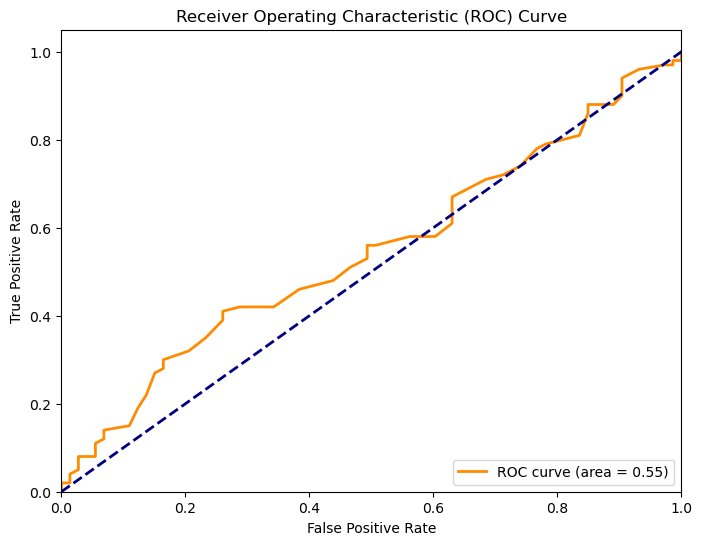

In [61]:
y_scores = clf.predict_proba(X_test)[:, 1]  # get probabilities for the positive class
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [62]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [63]:
fi = rf_feat_importance(clf, X_train)

In [64]:
fi

,cols,imp
16,vol_lag6,0.067672
3,close_lag4,0.057250
17,vol_lag7,0.056699
11,vol_lag1,0.054752
2,close_lag3,0.054425
0,close_lag1,0.054039
1,close_lag2,0.050433
7,std_close,0.048359
13,vol_lag3,0.046913
12,vol_lag2,0.043426


<Axes: ylabel='cols'>

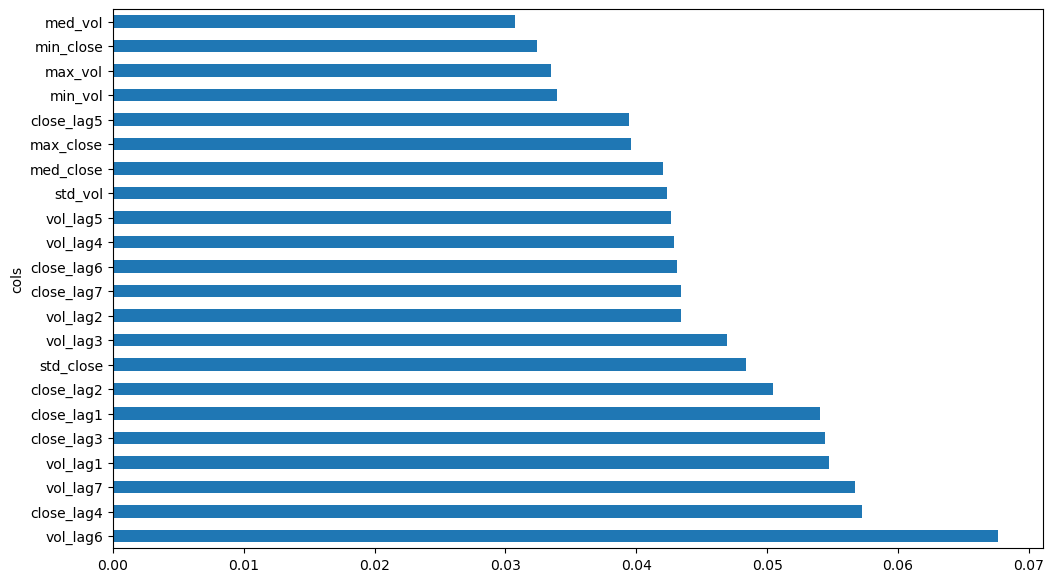

In [65]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])